In [1]:
import numpy as np
import pandas as pd

C:\Users\USER\AppData\Local\Temp\ipykernel_18116\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_excel("BlinkIT Grocery Data.xlsx")

In [3]:
df_array = np.array(df)

In [4]:
df_1D = np.array(df.iloc[0])

In [5]:
df_2D = np.array(df.iloc[0:5])

In [6]:
df_3D = np.array(df.iloc[0:3,5])

In [7]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [8]:
df1 = pd.DataFrame(df_array,columns=df.columns)
df1[df1['Item Fat Content']=='Regular']

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.021,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
15,Regular,FDB57,Fruits and Vegetables,2017,OUT035,Tier 2,Small,Supermarket Type1,0.018802,20.25,222.1772,5.0
20,Regular,FDZ07,Fruits and Vegetables,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.0,NaN,60.2194,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8509,Regular,FDU58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.028871,NaN,188.7898,4.0
8510,Regular,FDX46,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.057835,NaN,57.5562,4.0
8511,Regular,FDX57,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.047037,NaN,96.4068,4.0
8512,Regular,FDY33,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.09673,NaN,159.0262,4.0


In [9]:
#create a stackplot
import matplotlib.pyplot as plt
import numpy as np

df['Outlet Establishment Year'] = pd.to_numeric(df['Outlet Establishment Year'])
df['Outlet Establishment Year']

0       2012
1       2022
2       2016
3       2014
4       2015
        ... 
8518    2018
8519    2018
8520    2018
8521    2018
8522    2018
Name: Outlet Establishment Year, Length: 8523, dtype: int64

In [10]:
df['Sales'].dtype
df_agg = df.groupby([df['Outlet Establishment Year'],'Outlet Size'])[['Sales']].sum()

In [11]:
df_agg

Sales
Outlet Establishment Year Outlet Size             
2011                      High          32570.1230
                          Medium        37178.1112
                          Small          8383.3324
2012                      Medium       130476.8598
2014                      High         131809.0156
2015                      High          39556.2200
                          Medium        44122.4416
                          Small         47264.1186
2016                      Small        132113.3698
2017                      Small        133103.9070
2018                      Medium       130714.6746
                          Small         73807.5824
2020                      High          45056.2274
                          Medium        33925.8728
                          Small         50121.8602
2022                      Medium       131477.7764

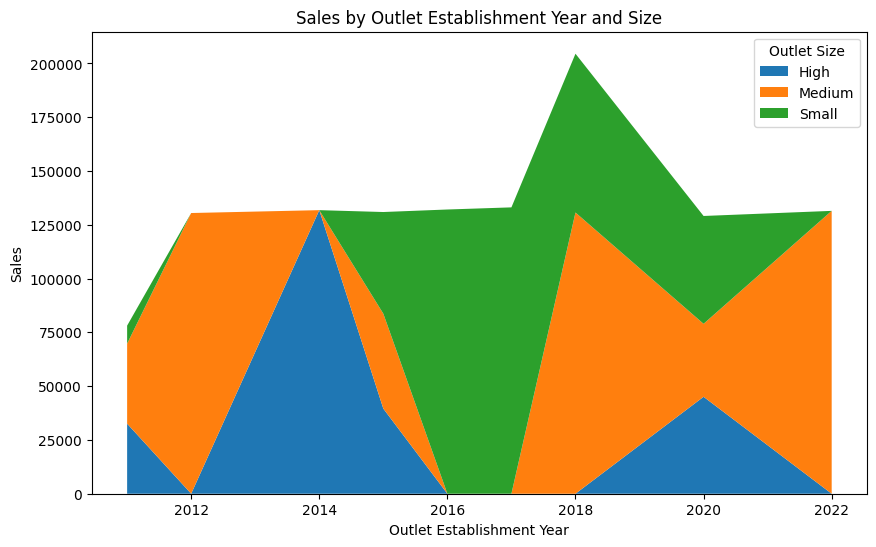

In [12]:
#Help me create an error bar plot by outlet size
df_unstacked = df_agg.unstack(level='Outlet Size').fillna(0)

# Step 2: Prepare data for stackplot
years = df_unstacked.index  # 'Outlet Establishment Year' as x-axis values
sales_data = [df_unstacked['Sales', size] for size in df_unstacked['Sales'].columns]  # List of sales data by size

# Step 3: Plot using stackplot
plt.figure(figsize=(10, 6))
plt.stackplot(years, sales_data, labels=df_unstacked['Sales'].columns)
plt.title("Sales by Outlet Establishment Year and Size")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Sales")
plt.legend(title="Outlet Size")
plt.show()

In [13]:
sales_data

[Outlet Establishment Year
 2011     32570.1230
 2012         0.0000
 2014    131809.0156
 2015     39556.2200
 2016         0.0000
 2017         0.0000
 2018         0.0000
 2020     45056.2274
 2022         0.0000
 Name: (Sales, High), dtype: float64,
 Outlet Establishment Year
 2011     37178.1112
 2012    130476.8598
 2014         0.0000
 2015     44122.4416
 2016         0.0000
 2017         0.0000
 2018    130714.6746
 2020     33925.8728
 2022    131477.7764
 Name: (Sales, Medium), dtype: float64,
 Outlet Establishment Year
 2011      8383.3324
 2012         0.0000
 2014         0.0000
 2015     47264.1186
 2016    132113.3698
 2017    133103.9070
 2018     73807.5824
 2020     50121.8602
 2022         0.0000
 Name: (Sales, Small), dtype: float64]

<ErrorbarContainer object of 3 artists>

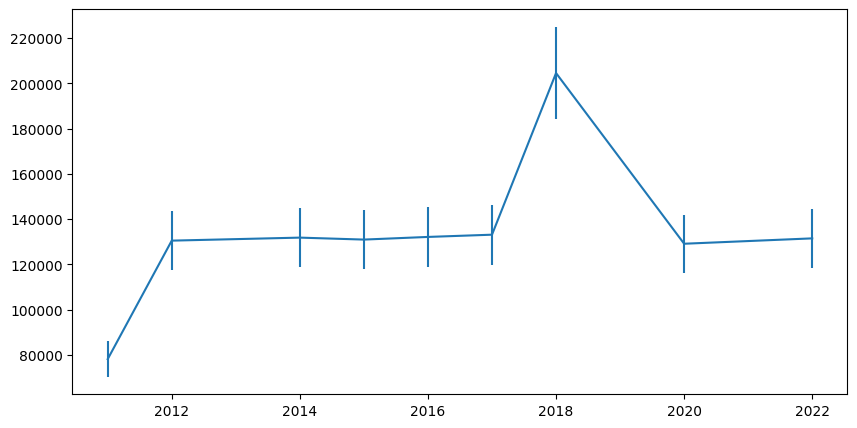

In [14]:
df_agg = df.groupby([df['Outlet Establishment Year']])['Sales'].sum()
plt.figure(figsize=(10,5))
plt.errorbar(df_agg.index,df_agg.values,yerr=0.1*df_agg.values)

In [20]:
#Give me an example for reshape, flatten, transpose

df_2D = np.array(df.iloc[0:5])
df_2D

df_2D.reshape(5,12)



array([['Regular', 'FDX32', 'Fruits and Vegetables', 2012, 'OUT049',
        'Tier 1', 'Medium', 'Supermarket Type1', 0.1000135, 15.1,
        145.4786, 5.0],
       ['Low Fat', 'NCB42', 'Health and Hygiene', 2022, 'OUT018',
        'Tier 3', 'Medium', 'Supermarket Type2', 0.008596051, 11.8,
        115.3492, 5.0],
       ['Regular', 'FDR28', 'Frozen Foods', 2016, 'OUT046', 'Tier 1',
        'Small', 'Supermarket Type1', 0.025896485, 13.85, 165.021, 5.0],
       ['Regular', 'FDL50', 'Canned', 2014, 'OUT013', 'Tier 3', 'High',
        'Supermarket Type1', 0.042277867, 12.15, 126.5046, 5.0],
       ['Low Fat', 'DRI25', 'Soft Drinks', 2015, 'OUT045', 'Tier 2',
        'Small', 'Supermarket Type1', 0.033970195, 19.6, 55.1614, 5.0]],
      dtype=object)

In [21]:
df_2D.flatten()


array(['Regular', 'FDX32', 'Fruits and Vegetables', 2012, 'OUT049',
       'Tier 1', 'Medium', 'Supermarket Type1', 0.1000135, 15.1, 145.4786,
       5.0, 'Low Fat', 'NCB42', 'Health and Hygiene', 2022, 'OUT018',
       'Tier 3', 'Medium', 'Supermarket Type2', 0.008596051, 11.8,
       115.3492, 5.0, 'Regular', 'FDR28', 'Frozen Foods', 2016, 'OUT046',
       'Tier 1', 'Small', 'Supermarket Type1', 0.025896485, 13.85,
       165.021, 5.0, 'Regular', 'FDL50', 'Canned', 2014, 'OUT013',
       'Tier 3', 'High', 'Supermarket Type1', 0.042277867, 12.15,
       126.5046, 5.0, 'Low Fat', 'DRI25', 'Soft Drinks', 2015, 'OUT045',
       'Tier 2', 'Small', 'Supermarket Type1', 0.033970195, 19.6, 55.1614,
       5.0], dtype=object)

In [22]:

df_2D.T

array([['Regular', 'Low Fat', 'Regular', 'Regular', 'Low Fat'],
       ['FDX32', 'NCB42', 'FDR28', 'FDL50', 'DRI25'],
       ['Fruits and Vegetables', 'Health and Hygiene', 'Frozen Foods',
        'Canned', 'Soft Drinks'],
       [2012, 2022, 2016, 2014, 2015],
       ['OUT049', 'OUT018', 'OUT046', 'OUT013', 'OUT045'],
       ['Tier 1', 'Tier 3', 'Tier 1', 'Tier 3', 'Tier 2'],
       ['Medium', 'Medium', 'Small', 'High', 'Small'],
       ['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type1',
        'Supermarket Type1', 'Supermarket Type1'],
       [0.1000135, 0.008596051, 0.025896485, 0.042277867, 0.033970195],
       [15.1, 11.8, 13.85, 12.15, 19.6],
       [145.4786, 115.3492, 165.021, 126.5046, 55.1614],
       [5.0, 5.0, 5.0, 5.0, 5.0]], dtype=object)